In [177]:
# import libraries
import numpy as np
import awkward as ak  # damn array be like me fr fr
import pandas as pd 
import os, h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from jason import jason_plotting as plotting
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('/Users/jasonwu/Programs/codes/def.mplstyle')
plotting.plot_prettier(dpi=400,usetex=True)
%matplotlib inline
import uproot

# Reading file

In [2]:
file = uproot.open("/Users/jasonwu/Programs/Fermilab/run_data/pfSamples_230815/pf/ldmx_genie_G18_02a_00_000_Ti_501.7.15cm.root")

In [3]:
file.keys()

['LDMX_Events;12', 'LDMX_Events;11', 'LDMX_Run;1']

In [4]:
file['LDMX_Events'].keys()

['TrigscintScoringPlaneHits_genie',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.id_',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.layerID_',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.moduleID_',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.edep_',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.time_',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.px_',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.py_',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.pz_',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.energy_',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.x_',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.y_',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.z_',
 'TrigscintScoringPlaneHits_genie/TrigscintScoringPlaneHits_genie.pathLength_',
 'Tr

In [5]:
file['LDMX_Events']['PFEcalClusters_pf/PFEcalClusters_pf.nHits_'].array(library='ak')

<Array [[36, 15, 12, 4, 2], [71], ..., [88], [94]] type='19999 * var * int32'>

In [6]:
ps = ['PFTruth_pf/PFTruth_pf.first',
 'PFTruth_pf/PFTruth_pf.second.energy_',
 'PFTruth_pf/PFTruth_pf.second.pdgID_',
 'PFTruth_pf/PFTruth_pf.second.genStatus_',
 'PFTruth_pf/PFTruth_pf.second.time_',
 'PFTruth_pf/PFTruth_pf.second.x_',
 'PFTruth_pf/PFTruth_pf.second.y_',
 'PFTruth_pf/PFTruth_pf.second.z_',
 'PFTruth_pf/PFTruth_pf.second.endX_',
 'PFTruth_pf/PFTruth_pf.second.endY_',
 'PFTruth_pf/PFTruth_pf.second.endZ_',
 'PFTruth_pf/PFTruth_pf.second.px_',
 'PFTruth_pf/PFTruth_pf.second.py_',
 'PFTruth_pf/PFTruth_pf.second.pz_',
 'PFTruth_pf/PFTruth_pf.second.endpx_',
 'PFTruth_pf/PFTruth_pf.second.endpy_',
 'PFTruth_pf/PFTruth_pf.second.endpz_',
 'PFTruth_pf/PFTruth_pf.second.mass_',
 'PFTruth_pf/PFTruth_pf.second.charge_',
 'PFTruth_pf/PFTruth_pf.second.daughters_',
 'PFTruth_pf/PFTruth_pf.second.parents_',
 'PFTruth_pf/PFTruth_pf.second.processType_',
 'PFTruth_pf/PFTruth_pf.second.vertexVolume_']
for p in ps:
    prop = file['LDMX_Events'][p].array(library='ak')
    print(p, ak.any(ak.ravel(prop)))

PFTruth_pf/PFTruth_pf.first True
PFTruth_pf/PFTruth_pf.second.energy_ True
PFTruth_pf/PFTruth_pf.second.pdgID_ True
PFTruth_pf/PFTruth_pf.second.genStatus_ True
PFTruth_pf/PFTruth_pf.second.time_ True
PFTruth_pf/PFTruth_pf.second.x_ False
PFTruth_pf/PFTruth_pf.second.y_ False
PFTruth_pf/PFTruth_pf.second.z_ True
PFTruth_pf/PFTruth_pf.second.endX_ True
PFTruth_pf/PFTruth_pf.second.endY_ True
PFTruth_pf/PFTruth_pf.second.endZ_ True
PFTruth_pf/PFTruth_pf.second.px_ True
PFTruth_pf/PFTruth_pf.second.py_ True
PFTruth_pf/PFTruth_pf.second.pz_ True
PFTruth_pf/PFTruth_pf.second.endpx_ True
PFTruth_pf/PFTruth_pf.second.endpy_ True
PFTruth_pf/PFTruth_pf.second.endpz_ True
PFTruth_pf/PFTruth_pf.second.mass_ True
PFTruth_pf/PFTruth_pf.second.charge_ True
PFTruth_pf/PFTruth_pf.second.daughters_ True
PFTruth_pf/PFTruth_pf.second.parents_ False
PFTruth_pf/PFTruth_pf.second.processType_ False
PFTruth_pf/PFTruth_pf.second.vertexVolume_ [True, True, True, True, True, True]


In [7]:
p = "PFEcalClusters_pf/PFEcalClusters_pf.energy_"
test_prop = file['LDMX_Events'][p].array(library='ak')
for prop in test_prop:
    print(len(prop), prop)

5 [944, 507, 174, 108, 18.7]
1 [4.14e+03]
1 [4.62e+03]
3 [3.49e+03, 530, 152]
3 [2.67e+03, 79.9, 50.2]
5 [2.69e+03, 131, 18.3, 17.7, 3.4]
2 [3.66e+03, 60.9]
2 [3.12e+03, 47.9]
1 [3.97e+03]
2 [2.99e+03, 18.3]
4 [3.55e+03, 61.2, 56.2, 22.8]
2 [3.79e+03, 57.9]
2 [3.63e+03, 574]
1 [3.02e+03]
2 [3.2e+03, 16.6]
2 [3.38e+03, 67.5]
3 [2.06e+03, 198, 198]
4 [2.97e+03, 167, 63.5, 31.1]
3 [3.8e+03, 98.7, 44.3]
4 [2.61e+03, 736, 64.4, 63.2]
2 [3.83e+03, 95.4]
2 [3.89e+03, 11]
2 [3.82e+03, 68.6]
3 [3.4e+03, 73.4, 18.9]
1 [3.16e+03]
1 [3.54e+03]
3 [3.23e+03, 105, 90.4]
1 [4.18e+03]
2 [3.33e+03, 126]
1 [3.52e+03]
2 [3.37e+03, 90.1]
3 [2.57e+03, 466, 146]
1 [4.09e+03]
2 [4.65e+03, 62]
1 [4.01e+03]
1 [4.23e+03]
2 [3.65e+03, 492]
2 [2.77e+03, 109]
1 [2.73e+03]
1 [4.08e+03]
1 [3.72e+03]
3 [1.74e+03, 455, 218]
2 [2.16e+03, 74.5]
1 [3.3e+03]
3 [2.91e+03, 41.6, 24.2]
2 [2.37e+03, 13]
1 [4.44e+03]
1 [3.13e+03]
1 [4.17e+03]
2 [2.43e+03, 16.3]
1 [3.64e+03]
5 [3.26e+03, 889, 247, 200, 55.6]
1 [4.15e+03]
2 [2.45

In [8]:
mask = ak.argmax(test_prop, axis=1, keepdims=True, mask_identity=True)
mask

<Array [[0], [0], [0], [0], ..., [0], [0], [0], [0]] type='19999 * 1 * ?int64'>

## Systematically reading the file

In [9]:
def get_data(file_name = 'pf.ele_0p1_4GeV.10k.1part.7.15cm.root',
             root_trial = 'pfSamples_230801',
             root_dir = '/Users/jasonwu/Programs/Fermilab/run_data',
             # the branches to include in the output
             included_branches = ['PFEcalClusters_pf', 'PFHcalClusters_pf', 'PFTracks_pf', 'PFCandidates_pf', 'PFTruth_pf', 'PFTruthTarget_pf', 'PFTruthEcal_pf', 'PFTruthHcal_pf'],
             # the branches to save directly
             saved_branches = ['EcalTotalEnergy_pf', 'HcalTotalEnergy_pf', 'PFTruth_pf/PFTruth_pf.second.vertexVolume_'],
             # if True, generates leading cluster properties
             lead_clust = False,
             # the branches to do leading cluster on
             lead_clust_branches = ['PFEcalClusters_pf', 'PFHcalClusters_pf'],
             lead_clust_override = False,
             # if True, prints type and number of points in each property
             verbose = False):
    file = uproot.open(f'{root_dir}/{root_trial}/pf/{file_name}')
    events = file['LDMX_Events']
    # all the keys in events
    keys = np.array(events.keys())
    save_mask = np.array([1 if (branch in saved_branches) else 0 for branch in keys]).astype(bool)
    keys = np.delete(keys, save_mask)
    # branches
    branch_mask = np.array([0 if ('/' in branch) else 1 for branch in keys]).astype(bool)
    branches = keys[branch_mask]
    branch_ind = np.append(np.where(branch_mask == 1)[0], -1)
                 
    if lead_clust_override:
        suffix_new = ''
        suffix_og = '_og'
    else:
        suffix_new = '_lc'
        suffix_og = ''
                 
    prop_dict = {}


    # save the branches directly
    for branch in saved_branches:  # check if within directly saved branch
        if verbose: print(f'{branch} is saved directly')
        saved_prop = np.array(events[branch])
        prop_dict[branch.replace('_pf', '')] = saved_prop
        
    for i in range(len(branches)):
        branch = branches[i]
        if branch in included_branches:  # check if within included branch
            if verbose: print(f'{branch} is included')
            # get all the nodes of the branch
            branch_nodes = keys[branch_ind[i]+1:] if branch_ind[i+1] == -1 else keys[branch_ind[i]+1 : branch_ind[i+1]]
            if verbose: print(branch_nodes)

            # get the energy indices for leading cluster anlaysis
            if lead_clust and (branch in lead_clust_branches):
                energy_node = f'{branch}/{branch}.energy_'  # string of the energy node
                # the awkward array corresponding to energy
                energy_prop = events[energy_node].array(library='ak')
                energy_prop = ak.values_astype(energy_prop, np.float64)
                # the indices corresponding to maximum energy (in case unsorted)
                max_ind = ak.argmax(energy_prop, axis=1, keepdims=True, mask_identity=True)
                
            # for each node in the branch
            for branch_node in branch_nodes:
                # make the awkward array
                prop = events[branch_node].array(library='ak')
                # pad the array with at least one entry
                prop = ak.pad_none(prop, 1, axis=1)

                # check if consisting of empty arrays
                if len(ak.ravel(prop)) == 0 or not ak.any(ak.ravel(prop)):  # effectively empty
                    # flatten the array into zeros
                    if verbose: print(f'Empty array at {branch_node}, reduced to zeroes')
                    prop_flat = np.zeros(len(prop))
                    if verbose: print(prop_flat.shape)

                    prop_dict[branch_node.split('/')[1].replace('_pf', '')[:-1].replace('.', '_')] = prop_flat
                elif len(ak.ravel(prop)) == len(prop):  # effectively one-dimensional
                    if verbose: print(f'One-dimensional array at {branch_node}, reduced to numpy')
                    prop_flat = ak.to_numpy(ak.ravel(prop), allow_missing=True).astype(float).filled(np.nan)
                    if verbose: print(prop_flat.shape)

                    prop_dict[branch_node.split('/')[1].replace('_pf', '')[:-1].replace('.', '_')] = prop_flat
                else:
                    # if the array is truly jagged
                    if verbose: print(f'Jagged/partially empty array at {branch_node}')
                    prop_flat = prop
                    if verbose: print(prop_flat.type)

                    # construct a leading cluster array
                    if lead_clust and (branch in lead_clust_branches):
                        # mask the array with max energy indices
                        max_prop = prop_flat[ak.from_regular(max_ind)]
                        # flatten, convert to numpy array, and fill with nan
                        # handles hit info
                        if 'hit' in branch_node:
                            # unravel max_prop
                            max_prop = ak.Array([np.array(_[0]) for _ in max_prop])
                            prop_dict[branch_node.split('/')[1].replace('_pf', '')[:-1].replace('.', '_') + suffix_new] = max_prop  # take out into lc data
                            prop_dict[branch_node.split('/')[1].replace('_pf', '')[:-1].replace('.', '_') + suffix_og] = prop_flat
                        else:
                            max_prop_flat = ak.to_numpy(ak.ravel(max_prop), allow_missing=True).astype(float)
                            max_prop_flat = max_prop_flat.filled(np.nan)
                            prop_dict[branch_node.split('/')[1].replace('_pf', '')[:-1].replace('.', '_') + suffix_new] = max_prop_flat  # lc data
                            prop_dict[branch_node.split('/')[1].replace('_pf', '')[:-1].replace('.', '_') + suffix_og] = prop_flat
                    else:  # no leading cluster array
                        prop_dict[branch_node.split('/')[1].replace('_pf', '')[:-1].replace('.', '_')] = prop_flat

        else:
            if verbose: print(f'{branch} is not included')
    return prop_dict

In [10]:
root_trial = 'pfSamples_230815'
test_part = get_data(file_name='ldmx_genie_G18_02a_00_000_Ti_501.7.15cm.root', root_trial=root_trial,
                     lead_clust=True, lead_clust_branches=['PFEcalClusters_pf'], lead_clust_override=False)
list(test_part.keys())

['EcalTotalEnergy',
 'HcalTotalEnergy',
 'PFTruth/PFTruth.second.vertexVolume_',
 'PFEcalClusters_hitIDs',
 'PFEcalClusters_energy_lc',
 'PFEcalClusters_energy',
 'PFEcalClusters_nHits_lc',
 'PFEcalClusters_nHits',
 'PFEcalClusters_centroidX_lc',
 'PFEcalClusters_centroidX',
 'PFEcalClusters_centroidY_lc',
 'PFEcalClusters_centroidY',
 'PFEcalClusters_centroidZ_lc',
 'PFEcalClusters_centroidZ',
 'PFEcalClusters_rmsX_lc',
 'PFEcalClusters_rmsX',
 'PFEcalClusters_rmsY_lc',
 'PFEcalClusters_rmsY',
 'PFEcalClusters_rmsZ_lc',
 'PFEcalClusters_rmsZ',
 'PFEcalClusters_DXDZ',
 'PFEcalClusters_DYDZ',
 'PFEcalClusters_errDXDZ',
 'PFEcalClusters_errDYDZ',
 'PFEcalClusters_hitX_lc',
 'PFEcalClusters_hitX',
 'PFEcalClusters_hitY_lc',
 'PFEcalClusters_hitY',
 'PFEcalClusters_hitZ_lc',
 'PFEcalClusters_hitZ',
 'PFEcalClusters_hitE_lc',
 'PFEcalClusters_hitE',
 'PFHcalClusters_hitIDs',
 'PFHcalClusters_energy',
 'PFHcalClusters_nHits',
 'PFHcalClusters_centroidX',
 'PFHcalClusters_centroidY',
 'PFHcal

In [13]:
len(test_part['EcalTotalEnergy'])

19999

In [11]:
np.sum(ak.all(np.hypot(test_part['PFTruthEcal_x'], test_part['PFTruthEcal_y']) < 200, axis=1))

11813

# Load Particles

## Particles Class

In [14]:
# initiate a particle class
class Particles():
    def __init__(self, prop_dict):
        # a list of properties
        self.propdict = prop_dict
        self._clean_props()
    
    # clean the data set
    def _clean_props(self):
        # also replace dictionary labels
        self.propdict['PFCandidates_ecalCalEnergy'] = self.propdict.pop('PFCandidates_ecalEnergy')
        self.propdict['PFCandidates_ecalEnergy'] = self.propdict.pop('PFCandidates_ecalRawEnergy')
        self.propdict['PFCandidates_hcalCalEnergy'] = self.propdict.pop('PFCandidates_hcalEnergy')
        self.propdict['PFCandidates_hcalEnergy'] = self.propdict.pop('PFCandidates_hcalRawEnergy')
    
    # return a property
    def get(self, prop = None):
        if prop is not None:  # if specific property(ies) are given
            if isinstance(prop, list):
                prop_list = []
                for single_prop in prop:
                    prop_list.append(self.propdict[single_prop])
                return prop_list
            else:
                assert prop in list(self.propdict.keys())
                return self.propdict[prop]
        else:
            return self.propdict
    
    # account for mass of particle
    def acc_mass(self, mass, columns=[]):
        # subtract mass
        for column in columns:
            # clipped to zero
            # therefore, 0 -> 0, mass + energy -> energy
            data = self.propdict[column]
            if isinstance(data, ak.Array):  # preserve shape
                shape = ak.num(data)
                data = ak.to_numpy(ak.flatten(data))  # flatten the data
                clipped_data = np.clip(data - mass, 0, None)
                clipped_data = ak.unflatten(clipped_data, shape)  # return to shape
                self.propdict[column] = clipped_data
            else:
                self.propdict[column] = np.clip(data - mass, 0, None)
    
    # return a list of all properties
    def list_props(self):        
        print(f'{"Property Name":<30}{"Number of Entries":<20}{"Unique Entries":<20}{"Range":<30}{"Mean"}')
        
        for prop in list(self.propdict.keys()):
            print(f'{prop: <30}{len(self.propdict[prop]):<20}{len(np.unique(self.propdict[prop])):<8}\
            {np.nanmin(self.propdict[prop]):<10.2f}{np.nanmax(self.propdict[prop]):>8.2f}\
            {np.nanmean(self.propdict[prop]):<.2f}')
        print('\n')
        return list(self.propdict.keys())
    
    # apply a correction to the ecal and hcal energy measurements
    def o1corr_energy(self, scheme='nearest',  # three schemes 'none', 'nearest' and 'spline'
                      energy_bins_ecal=[0, 6e3], o1corr_bins_ecal=[1],  # the bins and correction coefficients
                      energy_bins_hcal=[0, 6e3], o1corr_bins_hcal=[1],
                      ecal_labels=['EcalTotalEnergy', 'PFCandidates_ecalEnergy', 'PFEcalClusters_energy', 'PFEcalClusters_energy_lc'],
                      ecal_labels_map=['EcalTotalEnergy_corr', 'PFCandidates_ecalEnergy_corr', 'PFEcalClusters_energy_corr', 'PFEcalClusters_energy_lc_corr'],
                      hcal_labels=['HcalTotalEnergy', 'PFCandidates_hcalEnergy', 'PFHcalClusters_energy', 'PFHcalClusters_energy_lc'],
                      hcal_labels_map=['HcalTotalEnergy_corr', 'PFCandidates_hcalEnergy_corr', 'PFHcalClusters_energy_corr', 'PFHcalClusters_energy_lc_corr']):
        # correct the energies
        def get_corr(ecal_label=None, hcal_label=None):
            match scheme:  # different schemes to handle values outside of measured bins
                case 'none':  # set to NaN, breaks plots
                    def cut(data, bins=[0, 1e3], include_lowest=True, labels=[0]):
                        if isinstance(data, ak.Array):  # preserve shape
                            shape = ak.num(data)
                            data = ak.flatten(data)  # flatten the data
                            indices = np.digitize(data, bins=bins, right=True)
                            labels = np.hstack([np.nan, labels, np.nan])
                            binned_labels = np.array([labels[index] for index in indices])
                            binned_labels = ak.unflatten(binned_labels, shape)  # return to shape
                        else:  # regular array operation
                            indices = np.digitize(data, bins=bins, right=True)
                            labels = np.hstack([np.nan, labels, np.nan])
                            binned_labels = np.array([labels[index] for index in indices])
                        return binned_labels
                    # ecal
                    if ecal_label: o1corr_ecal = cut(self.get(ecal_label), bins=energy_bins_ecal, labels=o1corr_bins_ecal)
                    # hcal
                    if hcal_label: o1corr_hcal = cut(self.get(hcal_label), bins=energy_bins_hcal, labels=o1corr_bins_hcal)
                case 'nearest':  # sets to value of nearest bin
                    def nearest_cut(data, bins=[0, 6e3], labels=[1]):
                        if isinstance(data, ak.Array):  # preserve shape
                            shape = ak.num(data)
                            data = ak.to_numpy(ak.flatten(data))  # flatten the data
                            # assigns labels to data based on bins
                            label_ind = np.digitize(data, bins=bins, right=True)
                            # contains 0 and len(labels)
                            label_ind[label_ind == 0] = 1  # label_ind will start at 1
                            label_ind[label_ind == len(bins)] = len(labels)  # set to maximum ind
                            nearest_coeff = labels[label_ind - 1]
                            nearest_coeff = ak.unflatten(nearest_coeff, shape)  # return to shape
                        else:
                            # assigns labels to data based on bins
                            label_ind = np.digitize(data, bins=bins, right=True)
                            # contains 0 and len(labels)
                            label_ind[label_ind == 0] = 1  # label_ind will start at 1
                            label_ind[label_ind == len(bins)] = len(labels)  # set to maximum ind
                            nearest_coeff = labels[label_ind - 1]
                        return nearest_coeff
                    # ecal
                    if ecal_label: o1corr_ecal = nearest_cut(self.get(ecal_label), bins=energy_bins_ecal, labels=o1corr_bins_ecal)
                    # hcal
                    if hcal_label: o1corr_hcal = nearest_cut(self.get(hcal_label), bins=energy_bins_hcal, labels=o1corr_bins_hcal)
                case 'spline':
                    def spline_cut(data, bins=[0, 6e3], labels=[1]):
                        if isinstance(data, ak.Array):  # preserve shape
                            shape = ak.num(data)
                            data = ak.flatten(data)  # flatten the data
                            # construct spline object for bin centers
                            bin_centers = [(a + b) / 2 for a, b in zip(bins[::], bins[1::])] # average of two consecutive elements in bins
                            # calculate splined values for data
                            splined_coeff, _ = plotting.spline_xy(bin_centers, labels, data)
                            splined_coeff = ak.unflatten(splined_coeff, shape)  # return to shape
                        else:
                            # construct spline object for bin centers
                            bin_centers = [(a + b) / 2 for a, b in zip(bins[::], bins[1::])] # average of two consecutive elements in bins
                            # calculate splined values for data
                            splined_coeff, _ = plotting.spline_xy(bin_centers, labels, data)
                        return splined_coeff
                        
                    # ecal
                    if ecal_label: o1corr_ecal = spline_cut(self.get(ecal_label), bins=energy_bins_ecal, labels=o1corr_bins_ecal)
                    # hcal
                    if hcal_label: o1corr_hcal = spline_cut(self.get(hcal_label), bins=energy_bins_hcal, labels=o1corr_bins_hcal)
                
            if ecal_label:
                energy_o1corr_ecal = self.get(ecal_label) * o1corr_ecal
                return energy_o1corr_ecal
            if hcal_label:
                energy_o1corr_hcal = self.get(hcal_label) * o1corr_hcal
                return energy_o1corr_hcal

        # loop through all entries in labels list
        for ecal_label, ecal_label_map in zip(ecal_labels, ecal_labels_map):  # ecal correction
            energy_o1corr_ecal = get_corr(ecal_label=ecal_label)
            self.propdict[ecal_label_map] = energy_o1corr_ecal
        for hcal_label, hcal_label_map in zip(hcal_labels, hcal_labels_map):  # hcal correction
            energy_o1corr_hcal = get_corr(hcal_label=hcal_label)
            self.propdict[hcal_label_map] = energy_o1corr_hcal

In [16]:
import os

# all branches
included_branches = ['PFEcalClusters_pf', 'PFHcalClusters_pf', 'PFTracks_pf', 'PFCandidates_pf', 'PFTruthTarget_pf', 'PFTruthEcal_pf', 'PFTruthHcal_pf']
root_dir = '/Users/jasonwu/Programs/Fermilab/run_data'
root_trial = 'pfSamples_230815'

fname_list_full = np.sort(os.listdir(f'{root_dir}/{root_trial}/pf'))
fname_list = []
for fname in fname_list_full:
    if '.root' in fname:
        fname_list.append(fname)
fname_list

['ldmx_genie_G18_02a_00_000_Ti_501.7.15cm.root']

## Process particles (RELOAD)

In [17]:
#––––––––––––––––––––––––––––––––––––––––––––––#
#––––––––––––––––––––RELOAD––––––––––––––––––––#
#––––––––––––––––––––––––––––––––––––––––––––––#

reload = True

In [19]:
if reload:
    # load the particles
    root_dir = '/Users/jasonwu/Programs/Fermilab/run_data'
    root_trial = 'pfSamples_230815'
    # all branches
    included_branches = ['PFEcalClusters_pf', 'PFHcalClusters_pf', 'PFTracks_pf', 'PFCandidates_pf', 'PFTruth_pf', 'PFTruthTarget_pf', 'PFTruthEcal_pf', 'PFTruthHcal_pf']
    target_ind = ['PFTruthTarget_energy', 'PFTruthEcal_energy']
    
    print(f'Setting for {fname_list[0]}')
    en_event = Particles(get_data(file_name=fname_list[0], root_trial=root_trial,
                                  included_branches=included_branches,
                                  lead_clust=True, lead_clust_branches=['PFEcalClusters_pf', 'PFHcalClusters_pf'],
                                  lead_clust_override=False))

Setting for ldmx_genie_G18_02a_00_000_Ti_501.7.15cm.root


# Mass Energy Correction

In [20]:
ele_energy_bins_ecal = np.array([0., 500., 1000., 1500., 2000., 2500., 3000., 3500., 4000., 4500., 5000., 5500., 6000.])
avg_o1corr_ecal = np.array([1.18987852, 1.02952459, 0.99478492, 0.98629969, 0.98273146, 0.9760755 , 0.96378225, 0.93880792, 0.87393644, 0.80097519, 0.72741938, 0.66352241])
ext_bins_hcal = np.array([0., 50., 100., 150., 200., 250., 300., 350., 400., 450., 500., 550., 600., 650.]) * 10
pe_o1corr_hcal = np.array([8.4280355 ,  7.37783051,  7.75777364,  8.53401804,  9.46895409, 10.44644213, 10.46670198,  9.70749855,  8.87022924,  8.25057888, 8.25057888,  8.25057888,  8.25057888])
scheme = 'spline'
style = 1

In [22]:
if reload:
    # define the particle mass [MeV]
    electron_mass = 0.511
    neutron_mass = 939.56
    photon_mass = 0
    pion_mass = 139.57
    proton_mass = 938.27
    
    mass_dict = {
        'electrons' : 0.511,
        'neutrons' : 939.56,
        'photons' : 0,
        'pions' : 139.57,
        'protons' : 938.27
    }
    
    # subtract rest mass from the total energies, leaving kinetic
    # do not include measured energies
    full_cols = 'PFTruthTarget_energy PFTruth_second_energy PFTruthEcal_energy PFTruthHcal_energy'.split(' ')
    
    # subtract the mass
    
    en_event.o1corr_energy(energy_bins_ecal=ele_energy_bins_ecal, o1corr_bins_ecal=avg_o1corr_ecal,
                           energy_bins_hcal=ext_bins_hcal, o1corr_bins_hcal=pe_o1corr_hcal)
    # en_event.acc_mass(mass_dict[particles], columns=full_cols)

# Count Statistics

In [24]:
def calc_stats(particle=en_event, good_thres=[7, 7]):
        """ECAL cluster count"""
        hits_count_ecal = {}
        clusters_count_ecal = []  # all clusters count
        good_clusters_count_ecal = []  # good cluster count
        for clusters_nhits_ecal in particle.get('PFEcalClusters_nHits'):
            if np.any(clusters_nhits_ecal):
                num_clusters_ecal = len(clusters_nhits_ecal)
                num_good_clusters_ecal = np.sum(clusters_nhits_ecal >= good_thres[0])  # select all above threshold
                good_clusters_count_ecal.append(num_good_clusters_ecal)
                clusters_count_ecal.append(num_clusters_ecal)
                try:
                    hits_count_ecal[num_clusters_ecal] = np.hstack([hits_count_ecal[num_clusters_ecal], clusters_nhits_ecal])
                except KeyError:
                    hits_count_ecal[num_clusters_ecal] = []
            else:
                good_clusters_count_ecal.append(0)  # no clusters
                clusters_count_ecal.append(0)
        # number of clusters
        particle.propdict['PFEcalClusters_hits_count'] = hits_count_ecal
        print(list(particle.get('PFEcalClusters_hits_count').keys()))
        # all clusters
        particle.propdict['PFEcalClusters_count'] = np.array(clusters_count_ecal)
        print(np.unique(particle.get('PFEcalClusters_count'), return_counts=True))
        # good clusters
        particle.propdict['PFEcalClusters_good_count'] = np.array(good_clusters_count_ecal)
        print(np.unique(particle.get('PFEcalClusters_good_count'), return_counts=True))

        # ecal cluster energy
        ecal_good_mask = (particle.get('PFEcalClusters_nHits') >= good_thres[0])
        particle.propdict['PFEcalClusters_good_mask'] = ecal_good_mask
        # all cluster energy in an event
        particle.propdict['PFEcalClusters_energy_sum_corr'] = [np.nansum(_) for _ in particle.get('PFEcalClusters_energy_corr')]
        # all GOOD cluster energy in an event
        particle.propdict['PFEcalClusters_energy_gc_corr'] = [np.nansum(_) for _ in particle.get('PFEcalClusters_energy_corr')[ecal_good_mask]]

        """HCAL cluster count"""
        hits_count_hcal = {}
        clusters_count_hcal = []  # all clusters count
        good_clusters_count_hcal = []  # good cluster count
        for clusters_nhits_hcal in particle.get('PFHcalClusters_nHits'):
            if np.any(clusters_nhits_hcal):
                num_clusters_hcal = len(clusters_nhits_hcal)
                num_good_clusters_hcal = np.sum(clusters_nhits_hcal >= good_thres[1])  # select all above threshold
                good_clusters_count_hcal.append(num_good_clusters_hcal)
                clusters_count_hcal.append(num_clusters_hcal)
                try:
                    hits_count_hcal[num_clusters_hcal] = np.hstack([hits_count_hcal[num_clusters_hcal], clusters_nhits_hcal])
                except KeyError:
                    hits_count_hcal[num_clusters_hcal] = []
            else:
                good_clusters_count_hcal.append(0)  # no clusters
                clusters_count_hcal.append(0)
        # number of clusters
        particle.propdict['PFHcalClusters_hits_count'] = hits_count_hcal
        print(list(particle.get('PFHcalClusters_hits_count').keys()))
        # all clusters
        particle.propdict['PFHcalClusters_count'] = np.array(clusters_count_hcal)
        print(np.unique(particle.get('PFHcalClusters_count'), return_counts=True))
        # good clusters
        particle.propdict['PFHcalClusters_good_count'] = np.array(good_clusters_count_hcal)
        print(np.unique(particle.get('PFHcalClusters_good_count'), return_counts=True))

        # hcal cluster energy
        hcal_good_mask = (particle.get('PFHcalClusters_nHits') >= good_thres[1])
        particle.propdict['PFHcalClusters_good_mask'] = hcal_good_mask
        # all cluster energy in an event
        particle.propdict['PFHcalClusters_energy_sum_corr'] = [np.nansum(_) for _ in particle.get('PFHcalClusters_energy_corr')]
        # all GOOD cluster energy in an event
        particle.propdict['PFHcalClusters_energy_gc_corr'] = [np.nansum(_) for _ in particle.get('PFHcalClusters_energy_corr')[hcal_good_mask]]

In [25]:
# the dictionary of minimum hits
# 7 hits for 7cm ecal
# 7 hits for 15cm hcal
if reload: calc_stats(en_event, good_thres=[7, 7])

[5, 1, 3, 2, 4, 6, 7, 8]
(array([1, 2, 3, 4, 5, 6, 7, 8]), array([7712, 7108, 3505, 1188,  359,  102,   20,    5]))
(array([0, 1, 2, 3, 4, 5]), array([    1, 17087,  2385,   459,    61,     6]))
[4, 1, 2, 3, 6, 5, 10, 7, 8, 9, 12, 11]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([12802,  2987,  1941,  1026,   623,   296,   181,    75,    35,
          19,    10,     1,     3]))
(array([0, 1, 2, 3, 4, 5]), array([18636,  1115,   216,    28,     3,     1]))


In [35]:
list(en_event.propdict.keys())

['EcalTotalEnergy',
 'HcalTotalEnergy',
 'PFTruth/PFTruth.second.vertexVolume_',
 'PFEcalClusters_hitIDs',
 'PFEcalClusters_energy_lc',
 'PFEcalClusters_energy',
 'PFEcalClusters_nHits_lc',
 'PFEcalClusters_nHits',
 'PFEcalClusters_centroidX_lc',
 'PFEcalClusters_centroidX',
 'PFEcalClusters_centroidY_lc',
 'PFEcalClusters_centroidY',
 'PFEcalClusters_centroidZ_lc',
 'PFEcalClusters_centroidZ',
 'PFEcalClusters_rmsX_lc',
 'PFEcalClusters_rmsX',
 'PFEcalClusters_rmsY_lc',
 'PFEcalClusters_rmsY',
 'PFEcalClusters_rmsZ_lc',
 'PFEcalClusters_rmsZ',
 'PFEcalClusters_DXDZ',
 'PFEcalClusters_DYDZ',
 'PFEcalClusters_errDXDZ',
 'PFEcalClusters_errDYDZ',
 'PFEcalClusters_hitX_lc',
 'PFEcalClusters_hitX',
 'PFEcalClusters_hitY_lc',
 'PFEcalClusters_hitY',
 'PFEcalClusters_hitZ_lc',
 'PFEcalClusters_hitZ',
 'PFEcalClusters_hitE_lc',
 'PFEcalClusters_hitE',
 'PFHcalClusters_hitIDs',
 'PFHcalClusters_energy_lc',
 'PFHcalClusters_energy',
 'PFHcalClusters_nHits_lc',
 'PFHcalClusters_nHits',
 'PFHcalC

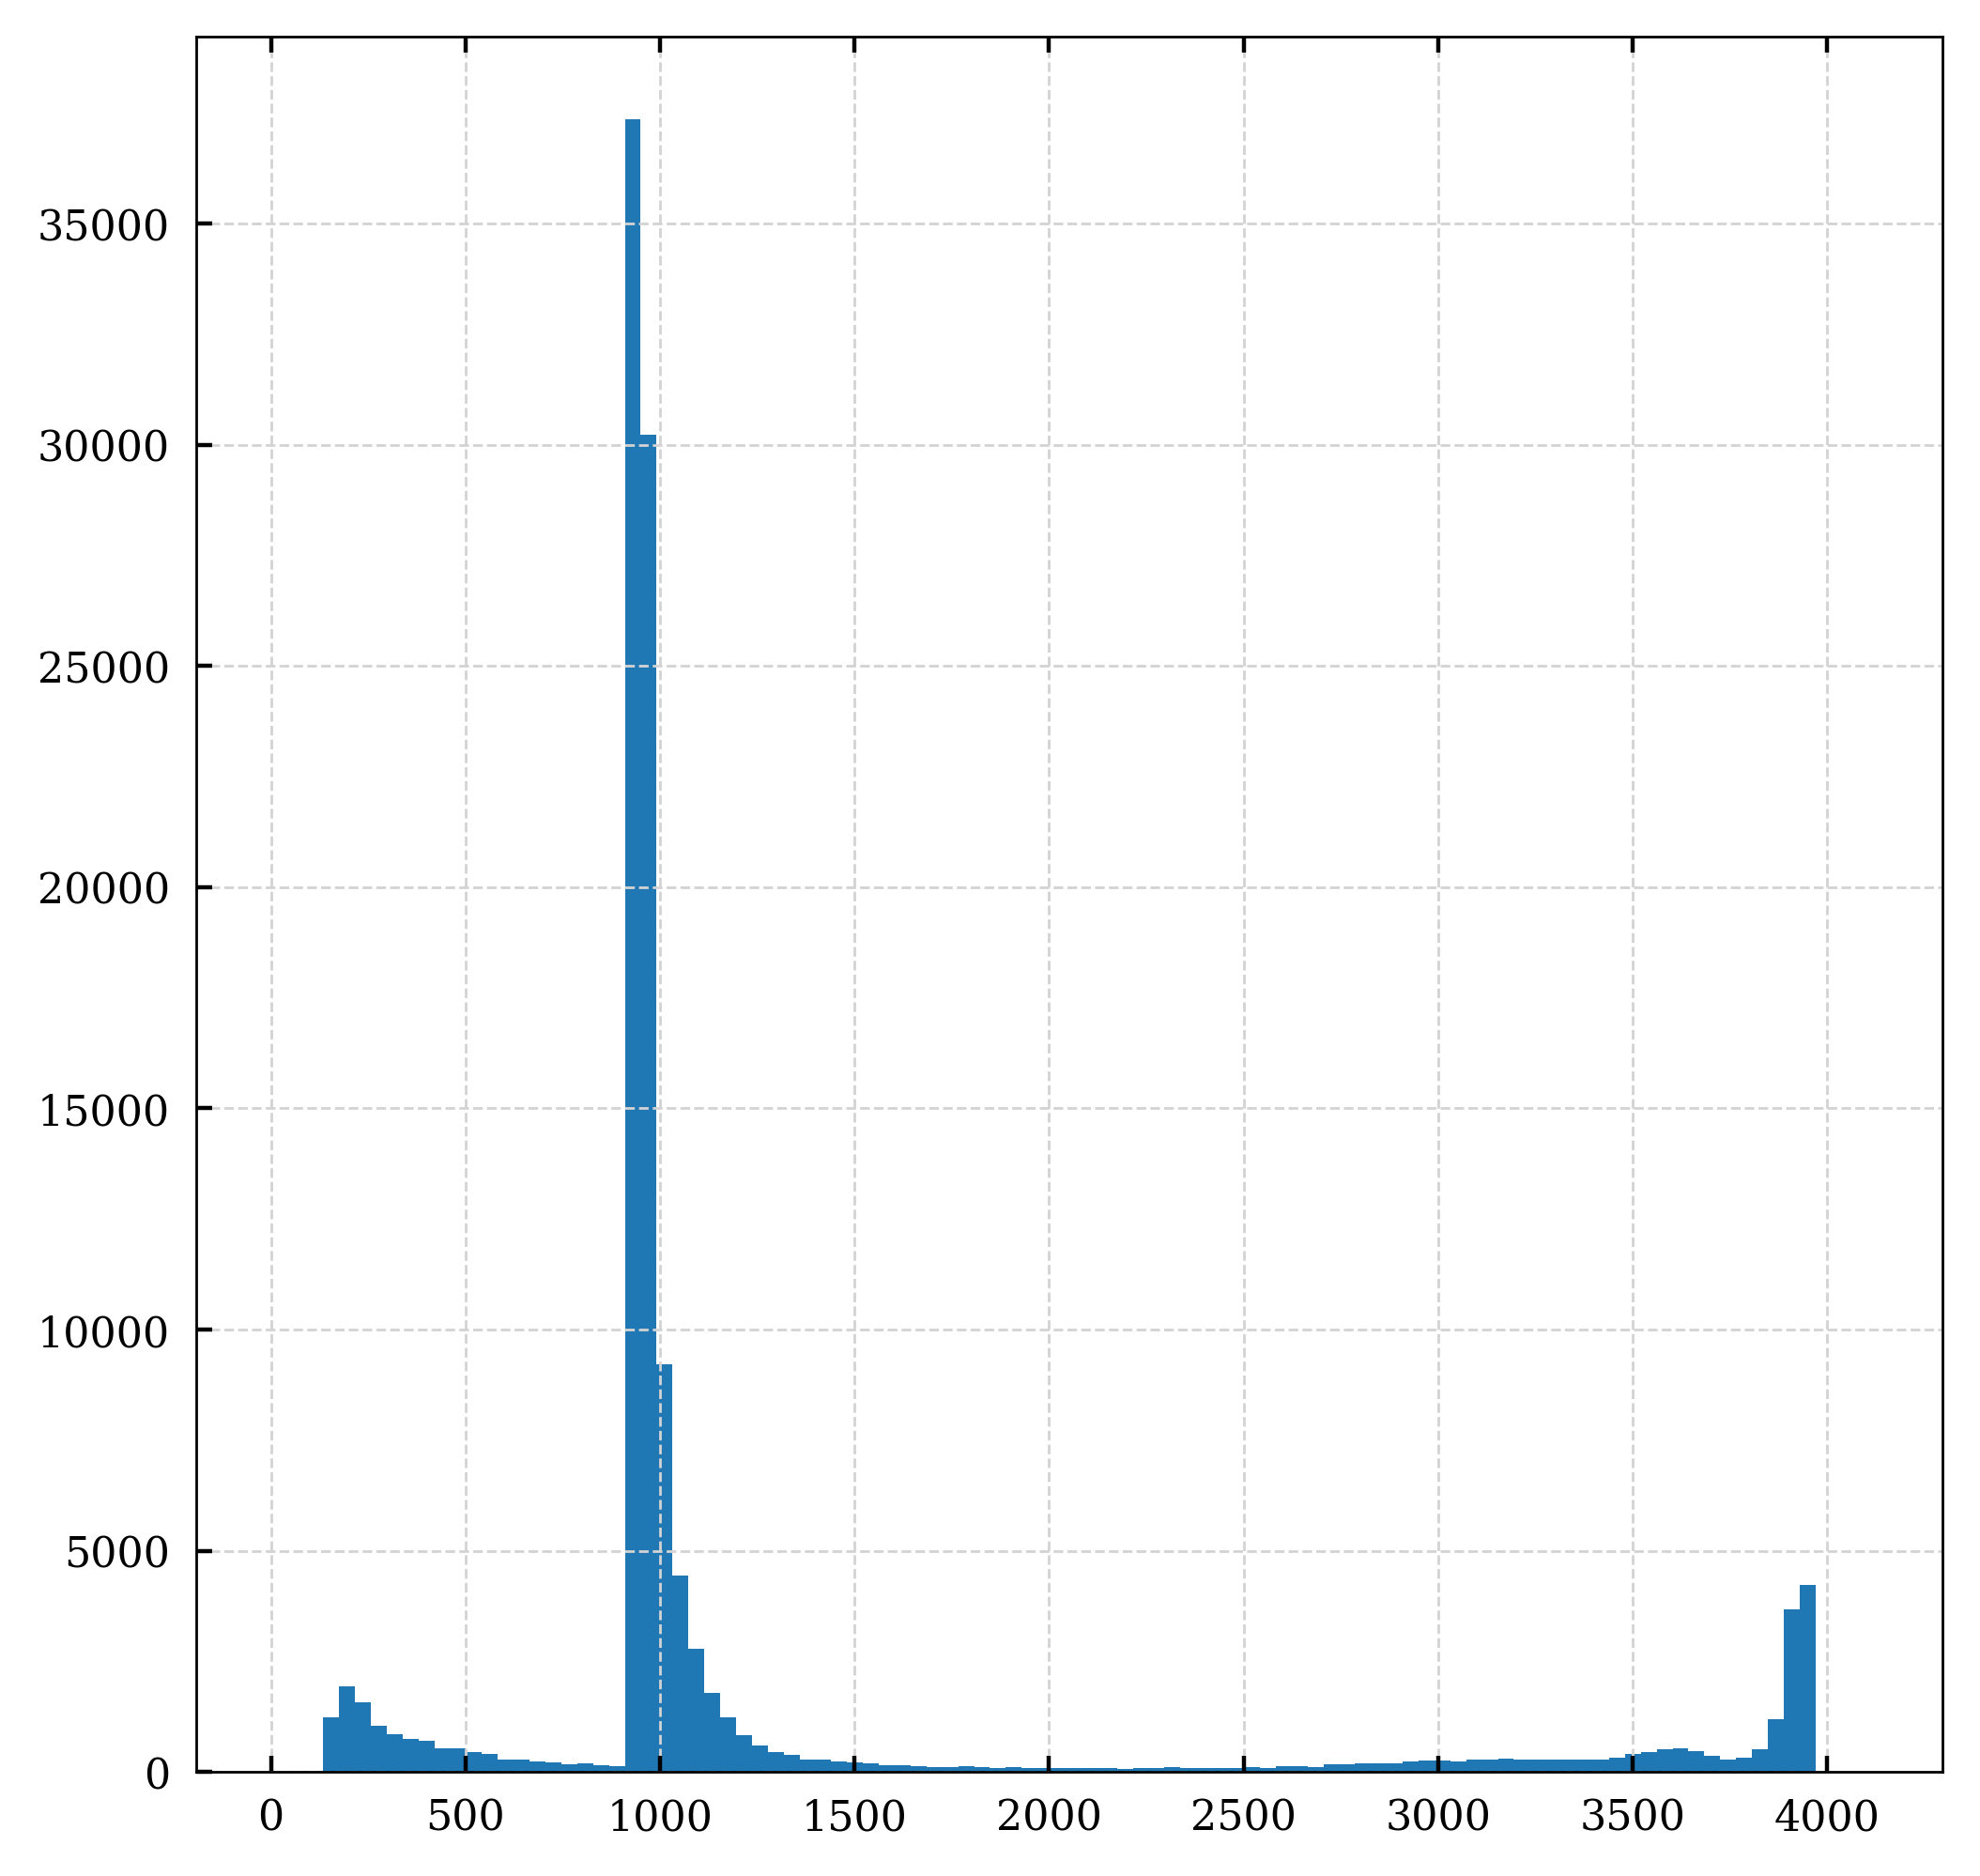

In [99]:
plt.hist(ak.ravel(en_event.get('PFTruth_second_energy')))
plt.show()

In [64]:
en_event.get('PFEcalClusters_energy')

<Array [[944, 507, 174, 108, 18.7], ...] type='19999 * var * ?float64'>

## Pickle

In [38]:
if reload:
    import pickle
    
    # dump the particles into pickle files
    
    file = open(f"data/pickles_230815/{fname_list[0]}.pkl", "wb")
    pickle.dump(en_event, file)
    file.close()

## Unpickle

In [39]:
if reload == False:  # load the existing pickle file
    import pickle
    
    # dump the particles into pickle files
    
    with open(f"data/pickles_230815/{fname_list[0]}.pkl", 'rb') as handle:
        data = handle.read()
    en_event = pickle.loads(data)

# Spatial Distributions

In [50]:
# global variables
ECALZ_MIN = 247.9
ECALZ_MAX = 749.1
ECALW = 520

BHCALZ_MIN = 879
SHCALZ_MIN = 240
SHCALZ_MAX = 800
SHCALX_MIN = 500
SHCALX_MAX = 1500

# the style used for the confidence range plots
# 0: area
# 1: error bars
style = 1

def plot_box(ax, label=False):
    box_label = 'ECal' if label else ''
    ax.add_patch(plt.Rectangle((ECALZ_MIN, -ECALW/2), ECALZ_MAX - ECALZ_MIN, ECALW, fc=(0, 0, 0, 0), ec='red', label=box_label))
    
def plot_hcal_box(ax, label=False):
    box_label = 'HCal' if label else ''
    ax.add_patch(plt.Rectangle((SHCALZ_MIN, SHCALX_MIN), SHCALZ_MAX - SHCALZ_MIN, SHCALX_MAX - SHCALX_MIN, fc=(0, 0, 0, 0), ec='red', label=box_label))
    ax.add_patch(plt.Rectangle((SHCALZ_MIN, -SHCALX_MAX), SHCALZ_MAX - SHCALZ_MIN, SHCALX_MAX - SHCALX_MIN, fc=(0, 0, 0, 0), ec='red', label=box_label))
    ax.axvline(x=BHCALZ_MIN, lw=1, ls='--', color='red', label=box_label)

# plot the cluster distribution
def plot_cluster_dist(event=en_event, min_sep=[7, 15], spec_part=None, ipart=None, # particle parameters
                      factor=10, length=50, hit_size=0.5, extend=False, xlim=3000, ylim=1000, # line parameters
                      plot_track=True, plot_ecal=True, plot_hcal=True, plot_energy=False, angle_label=True, # plotting booleans
                      cmap='tab20', track_color='black', color='slateblue', hcal_color='orange'):  # color parameters
    from matplotlib.patches import Polygon
    from matplotlib import cm
    
    # get parameters
    particles = event
    cluster_count = particles.get('PFEcalClusters_good_count')
    track_Pz = particles.get('PFCandidates_trackPz')
    track_Px = particles.get('PFCandidates_trackPx')
    track_posX = particles.get('PFCandidates_posEcalX')
    ecal_clusterZ = particles.get('PFEcalClusters_centroidZ')
    ecal_clusterX = particles.get('PFEcalClusters_centroidX')
    ecal_clusterEZ = particles.get('PFEcalClusters_rmsZ')
    ecal_clusterEX = particles.get('PFEcalClusters_rmsX')
    ecal_clusterDXDZ = particles.get('PFEcalClusters_DXDZ')
    hcal_clusterZ = particles.get('PFHcalClusters_centroidZ')
    hcal_clusterX = particles.get('PFHcalClusters_centroidX')
    hcal_clusterEZ = particles.get('PFHcalClusters_rmsZ')
    hcal_clusterEX = particles.get('PFHcalClusters_rmsX')
    hcal_clusterDXDZ = particles.get('PFHcalClusters_DXDZ')

    if plot_ecal:
        ecal_hitsX = particles.get('PFEcalClusters_hitX')
        ecal_hitsY = particles.get('PFEcalClusters_hitY')
        ecal_hitsZ = particles.get('PFEcalClusters_hitZ')
    if plot_hcal:
        hcal_hitsX = particles.get('PFHcalClusters_hitX')
        hcal_hitsY = particles.get('PFHcalClusters_hitY')
        hcal_hitsZ = particles.get('PFHcalClusters_hitZ')
    
    # get the index of max number of clusters
    if not ipart:
        ipart = np.argmax(cluster_count)

    print(f"# of particles: {len(particles.get('PFTruthTarget_z')[ipart])}")
    print(f'# of clust: {cluster_count[ipart]}')
    print(f'particle index: {ipart}')
    
    # setting up plot
    fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
    full_cmap = cm.get_cmap(cmap)
    color_list = [full_cmap(i)[:3] for i in range(full_cmap.N)]*10

    """Track Momentum"""
    if plot_track:
        if ak.any(track_Pz):
            # add triangle
            Pz = track_Pz[ipart][0]/factor
            Px = track_Px[ipart][0]/factor
            xy = [[ECALZ_MIN, track_posX[ipart][0]], [ECALZ_MIN+Pz, track_posX[ipart][0]], [ECALZ_MIN+Pz, track_posX[ipart][0]+Px]]
            momentum = Polygon(xy=xy, fc='None', ec=track_color, ls='--', label='Track')
            ax.add_patch(momentum)
            # add annotation
            track_angle = np.rad2deg(np.arctan(Px/Pz))
            ax.text(ECALZ_MIN+Pz/2, ECALW/2+20, fr'Track {track_angle:.2f} $\deg$', color=track_color, ha='center')
            # extend
            if extend:
                ax.axline(xy1=[ECALZ_MIN, track_posX[ipart][0]], xy2=[ECALZ_MIN + Pz * 10, track_posX[ipart][0] + Px * 10], lw=1, ls='--', alpha=0.5, color=track_color)
    
    """Ecal Box"""
    if plot_ecal:
        # clusters
        ecal_z = ecal_clusterZ[ipart]
        ecal_x = ecal_clusterX[ipart]
        ecal_ez = ecal_clusterEZ[ipart]
        ecal_ex = ecal_clusterEX[ipart]
        ecal_tan = ecal_clusterDXDZ[ipart]
        # hits
        ecal_hx = ecal_hitsX[ipart]
        ecal_hy = ecal_hitsY[ipart]
        ecal_hz = ecal_hitsZ[ipart]
            
        # plot the hits
        markers = ['.', 'o', 'v', '^', '<', '>', '8', 's', 'p', 'h', 'H', 'D', 'd', 'P'] * 10
        i = 0
        for ecal_hx, ecal_hy, ecal_hz, ecal_hits_erg in zip(ecal_hx, ecal_hy, ecal_hz,
                                                            particles.get('PFEcalClusters_hitE')[ipart]):
            ecal_hits_erg = 0 if ecal_hits_erg is None else ecal_hits_erg
            ax.scatter(x=ecal_hz, y=ecal_hx, s=ecal_hits_erg * hit_size, c=color_list[i], alpha=0.8, lw=1, marker=markers[i])
            i += 1
        
        # check for multiple clusters
        if np.isscalar(ecal_z):
            ecal_z = [ecal_z]
            ecal_x = [ecal_x]
            ecal_ez = [ecal_ez]
            ecal_ex = [ecal_ex]
        if isinstance(ecal_clusterDXDZ, np.ndarray):
            ecal_tan = [ecal_tan]

        i = 0
        for ecal_z, ecal_x, ecal_ez, ecal_ex, ecal_tan in zip(ecal_z, ecal_x, ecal_ez, ecal_ex, ecal_tan):
            [ecal_z, ecal_x, ecal_ez, ecal_ex, ecal_tan] = [0 if not _ else _ for _ in [ecal_z, ecal_x, ecal_ez, ecal_ex, ecal_tan]]
            ax.errorbar(x=ecal_z, y=ecal_x, xerr=[[ecal_ez], [ecal_ez]], yerr=[[ecal_ex], [ecal_ex]], color=color_list[i], elinewidth=1, fmt='-', label='ECal Cluster')
            # the angle
            ecal_angle = np.rad2deg(np.arctan(ecal_tan))
            if abs(ecal_angle) > 5:
                ax.plot([ecal_z+ecal_ez, ecal_z-ecal_ez], [ecal_x+ecal_tan*ecal_ez, ecal_x-ecal_tan*ecal_ez], color=color_list[i], lw=1, ls='--', alpha=0.8)
                if angle_label:
                    ax.text(ecal_z, -ylim, f'{ecal_angle:.2f}', color=color_list[i], ha='center')
                # extend
                if extend:
                    ax.axline(xy1=[ecal_z, ecal_x], xy2=[ecal_z + length * 10, ecal_x + length * 10 * ecal_tan], lw=1, ls='--', alpha=0.5, color=color_list[i])
            i += 1
    
    """Hcal Box"""
    if plot_hcal:
        hcal_z = hcal_clusterZ[ipart]
        hcal_x = hcal_clusterX[ipart]
        hcal_ez = hcal_clusterEZ[ipart]
        hcal_ex = hcal_clusterEX[ipart]
        hcal_tan = hcal_clusterDXDZ[ipart]

        hcal_hx = hcal_hitsX[ipart]
        hcal_hy = hcal_hitsY[ipart]
        hcal_hz = hcal_hitsZ[ipart]
        
        # plot the hits
        markers = ['.', 'o', 'v', '^', '<', '>', '8', 's', 'p', 'h', 'H', 'D', 'd', 'P'] * 10
        i = 0
        for hcal_hx, hcal_hy, hcal_hz, hcal_hits_erg in zip(hcal_hx, hcal_hy, hcal_hz,
                                                            particles.get('PFHcalClusters_hitE')[ipart]):
            hcal_hits_erg = 0 if hcal_hits_erg is None else hcal_hits_erg
            ax.scatter(x=hcal_hz, y=hcal_hx, s=hcal_hits_erg * hit_size, c=color_list[i], alpha=0.8, lw=1, marker=markers[i])
            i += 1
        
        # check for multiple clusters
        if np.isscalar(hcal_z):
            hcal_z = [hcal_z]
            hcal_x = [hcal_x]
            hcal_ez = [hcal_ez]
            hcal_ex = [hcal_ex]
        if isinstance(hcal_clusterDXDZ, np.ndarray):
            hcal_tan = [hcal_tan]

        i = 0
        for hcal_z, hcal_x, hcal_ez, hcal_ex, hcal_tan in zip(hcal_z, hcal_x, hcal_ez, hcal_ex, hcal_tan):
            [hcal_z, hcal_x, hcal_ez, hcal_ex, hcal_tan] = [0 if not _ else _ for _ in [hcal_z, hcal_x, hcal_ez, hcal_ex, hcal_tan]]
            ax.errorbar(x=hcal_z, y=hcal_x, xerr=[[hcal_ez], [hcal_ez]], yerr=[[hcal_ex], [hcal_ex]], color=color_list[i], elinewidth=1, fmt='-', label='HCal Cluster')
            # the angle
            hcal_angle = np.rad2deg(np.arctan(hcal_tan))
            if abs(hcal_angle) > 5:
                ax.plot([hcal_z+hcal_ez, hcal_z-hcal_ez], [hcal_x+hcal_tan*hcal_ez, hcal_x-hcal_tan*hcal_ez], color=color_list[i], lw=1, ls='--', alpha=0.8)
                if angle_label:
                    ax.text(hcal_z, -ylim, f'{hcal_angle:.2f}', color=color_list[i], ha='center')
                # extend
                if extend:
                    ax.axline(xy1=[hcal_z, hcal_x], xy2=[hcal_z + length * 10, hcal_x + length * 10 * hcal_tan], lw=1, ls='--', alpha=0.5, color=color_list[i])
            i += 1

    """Energy"""
    if plot_energy:
        measure_energy = particles.get("PFCandidates_ecalEnergy")[ipart]
        measure_hcal_energy = particles.get("PFCandidates_hcalEnergy")[ipart]
        recon_energy = particles.get("PFCandidates_ecalEnergy_corr")[ipart]
        recon_hcal_energy = particles.get("PFCandidates_hcalEnergy_corr")[ipart]
        truth_energy = particles.get("PFTruthEcal_energy")[ipart]
        truth_hcal_energy = particles.get("PFTruthHcal_energy")[ipart]
        energy_text_x = 1490
        # ax.text(energy_text_x, -450, f'Ecal {measure_energy:.2f} MeV', ha='right')
        # ax.text(energy_text_x, -550, f'Hcal {measure_hcal_energy:.2f} MeV', ha='right')
        ax.text(energy_text_x, -650, f'Ecal Recon {recon_energy:.2f} MeV', ha='right')
        ax.text(energy_text_x, -750, f'Hcal Recon {recon_hcal_energy:.2f} MeV', ha='right')
        ax.text(energy_text_x, -850, f'Ecal Truth {truth_energy:.2f} MeV', ha='right')
        ax.text(energy_text_x, -950, f'Hcal Truth {truth_hcal_energy:.2f} MeV', ha='right')

    # axis
    ax.set_xlabel('Detector z')
    ax.set_ylabel('Detector x')
    ax.set_xlim(200, xlim)
    ax.set_ylim(-ylim, ylim)
        
    # boxes
    plot_box(ax, 0)
    plot_hcal_box(ax, 0)
    ax.annotate(text=f'ECal {min_sep[0]}cm; HCal {min_sep[1]}cm', xy=(-40, -20), ha='left', xycoords='axes points', fontsize=8, weight='bold')
    ax.annotate(text='EN Event', xy=(-40, -30), ha='left', xycoords='axes points', fontsize=8, weight='bold')
    # plt.legend(fontsize=10)
    plt.show()

## Figures

For each particle type, the event with the most clusters is plotted first, followed by ten more randomly selected events:

# of particles: 4
# of clust: 5
particle index: 6064


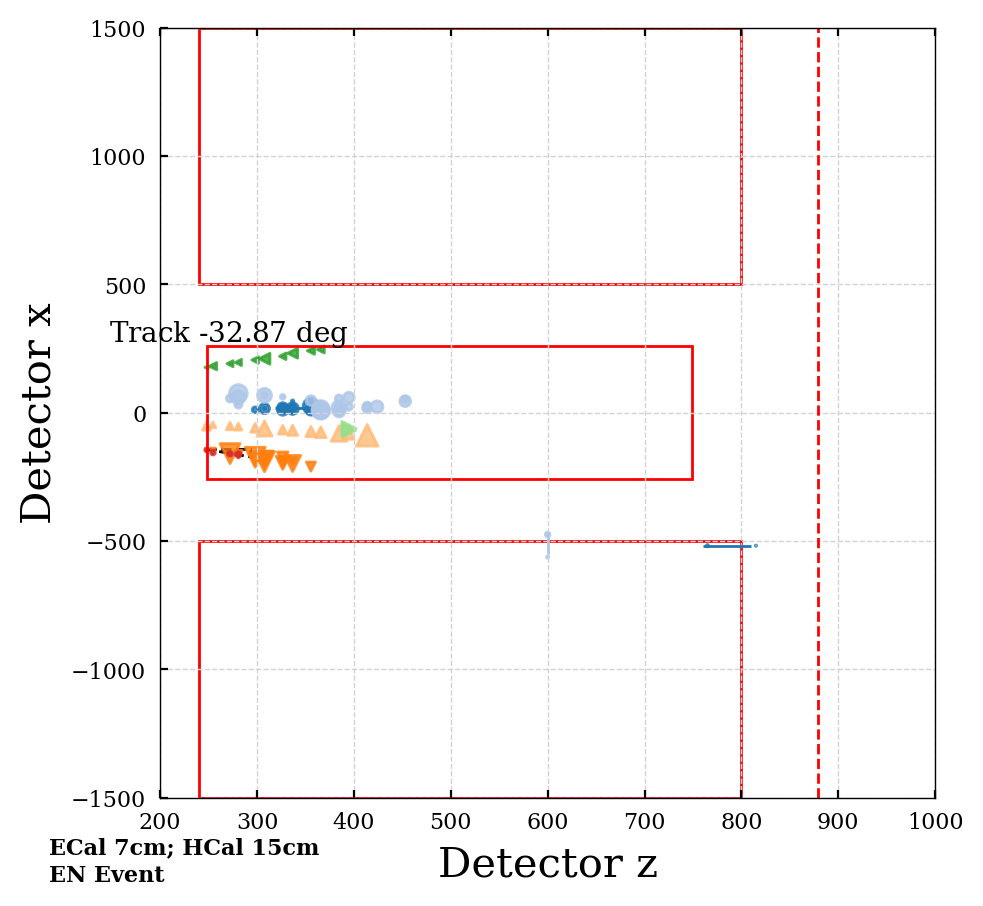

# of particles: 3
# of clust: 1
particle index: 5272


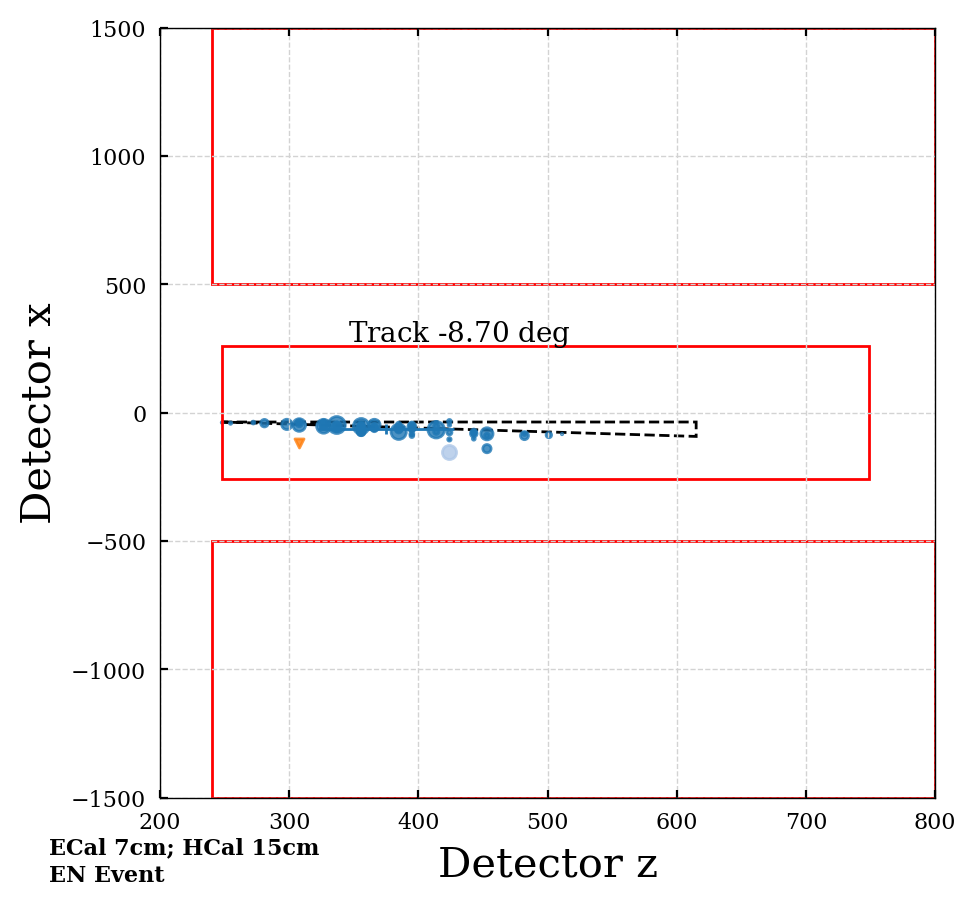

# of particles: 3
# of clust: 1
particle index: 4525


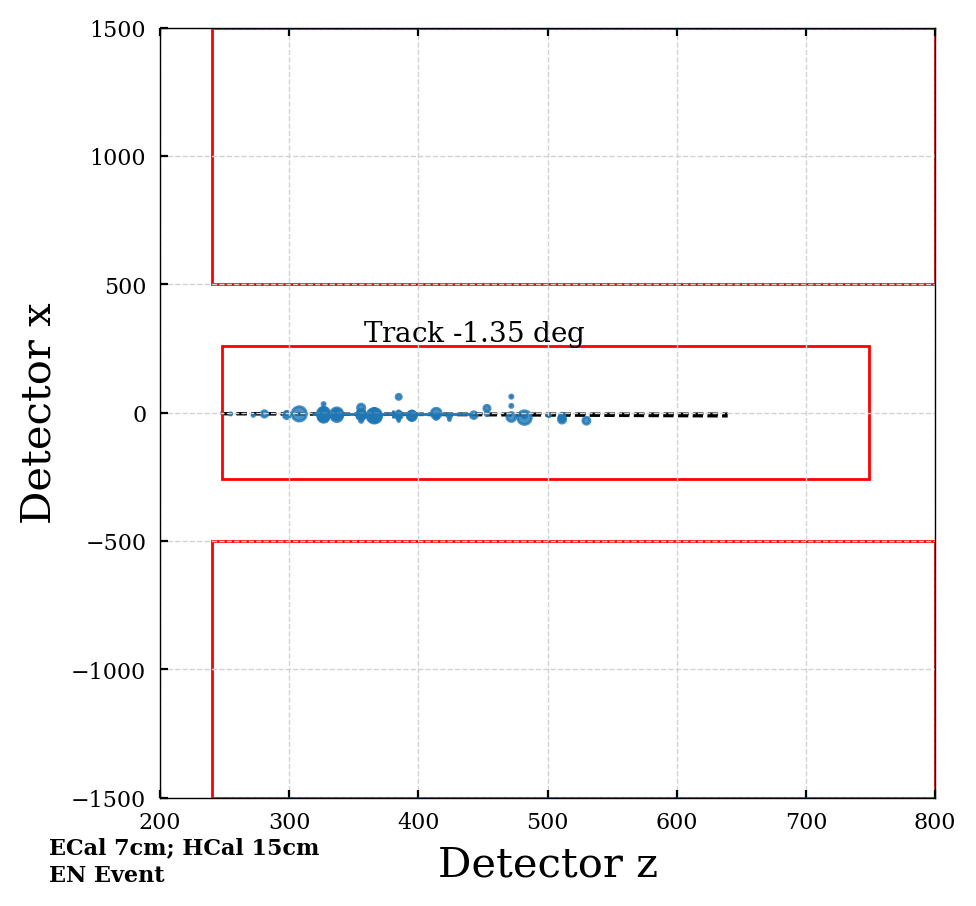

# of particles: 2
# of clust: 1
particle index: 4444


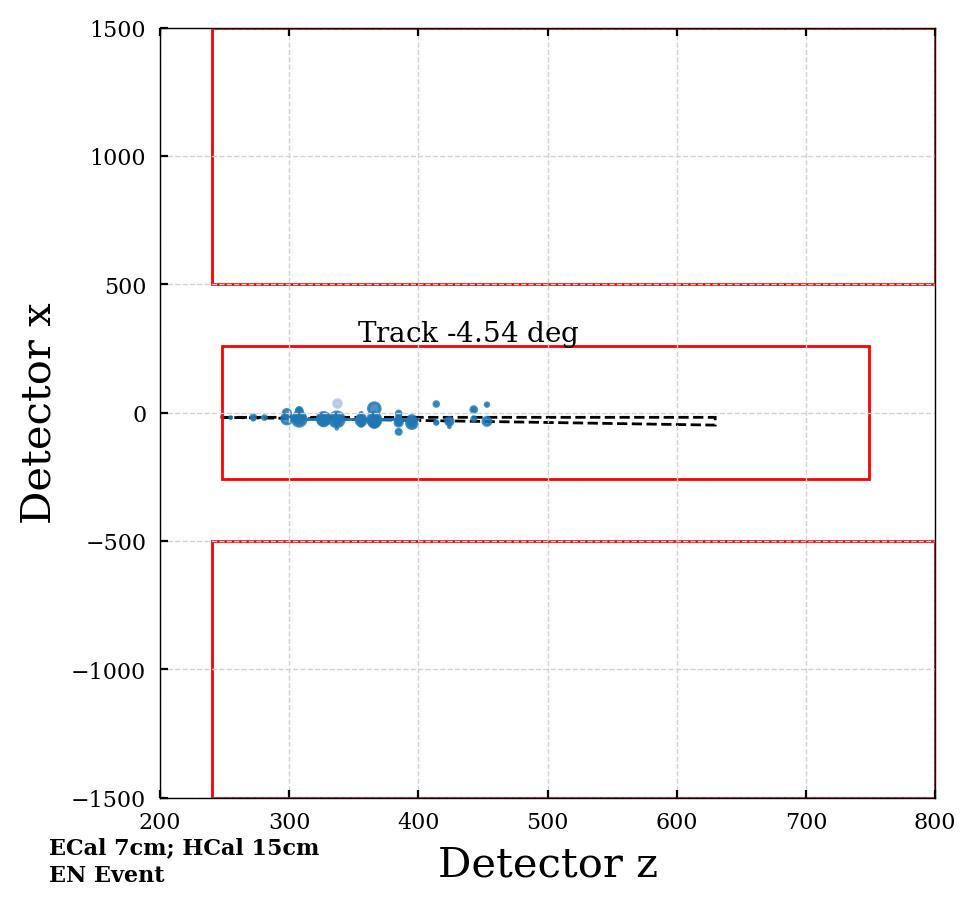

# of particles: 2
# of clust: 2
particle index: 3968


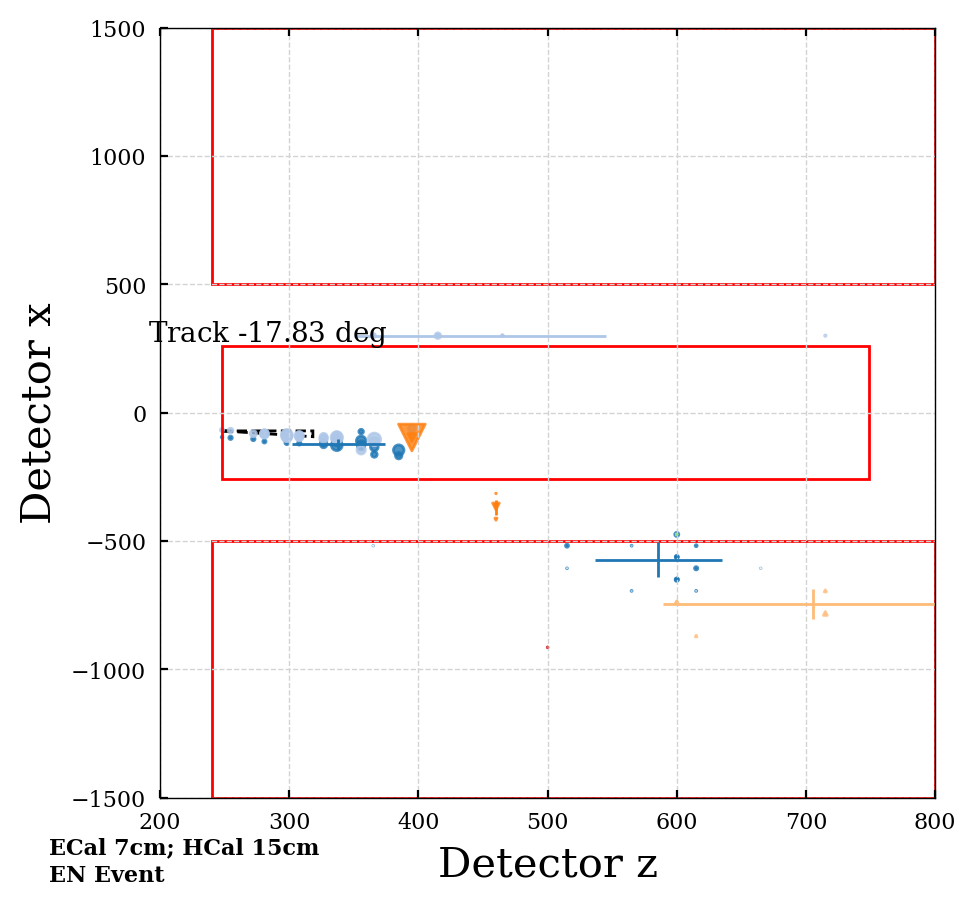

# of particles: 1
# of clust: 1
particle index: 8941


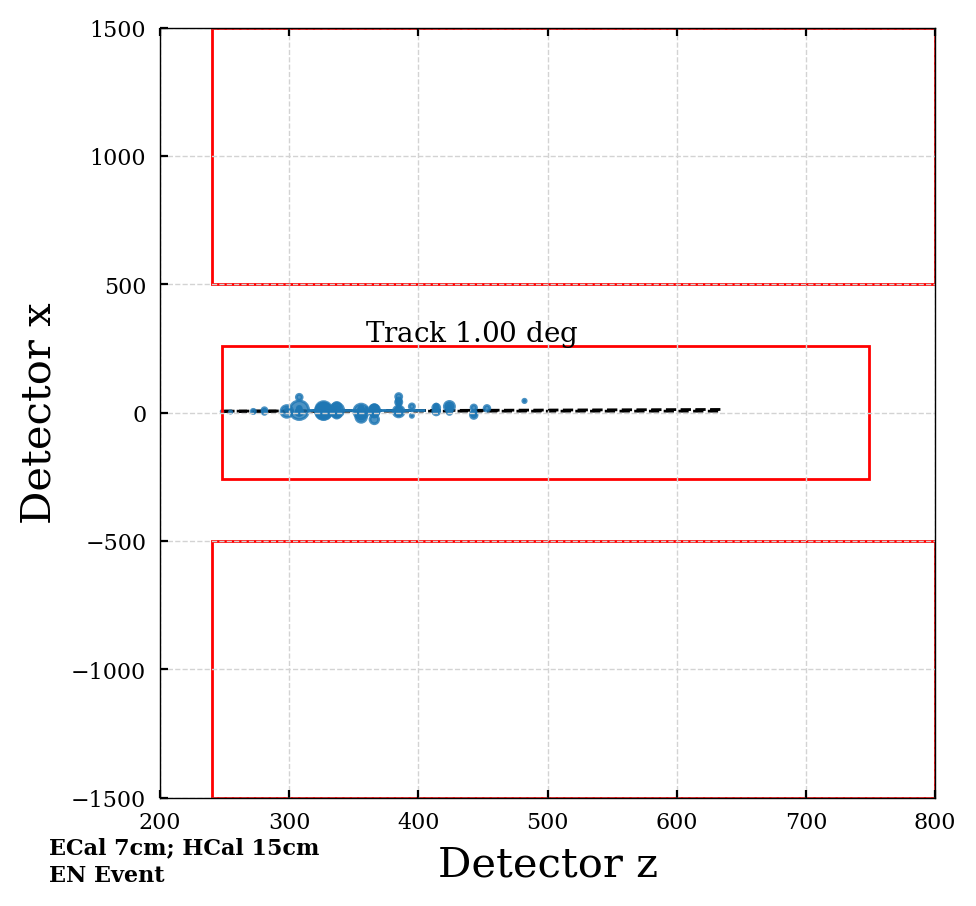

# of particles: 2
# of clust: 1
particle index: 7543


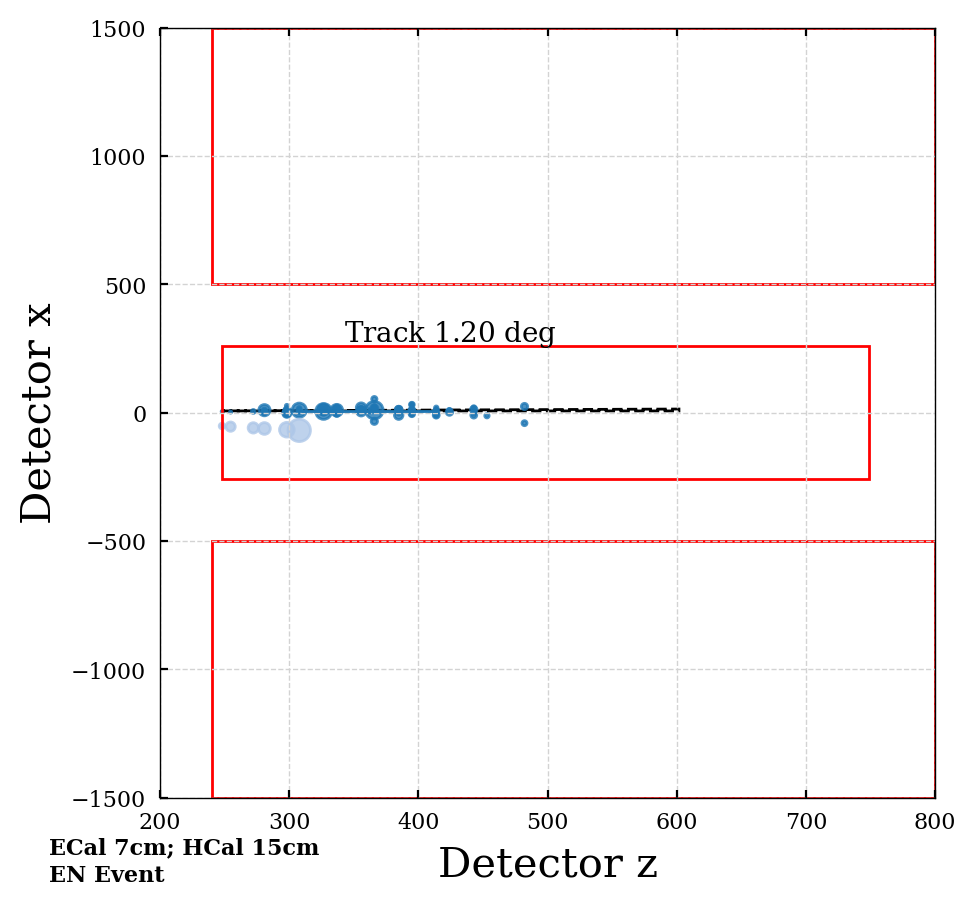

# of particles: 3
# of clust: 1
particle index: 2856


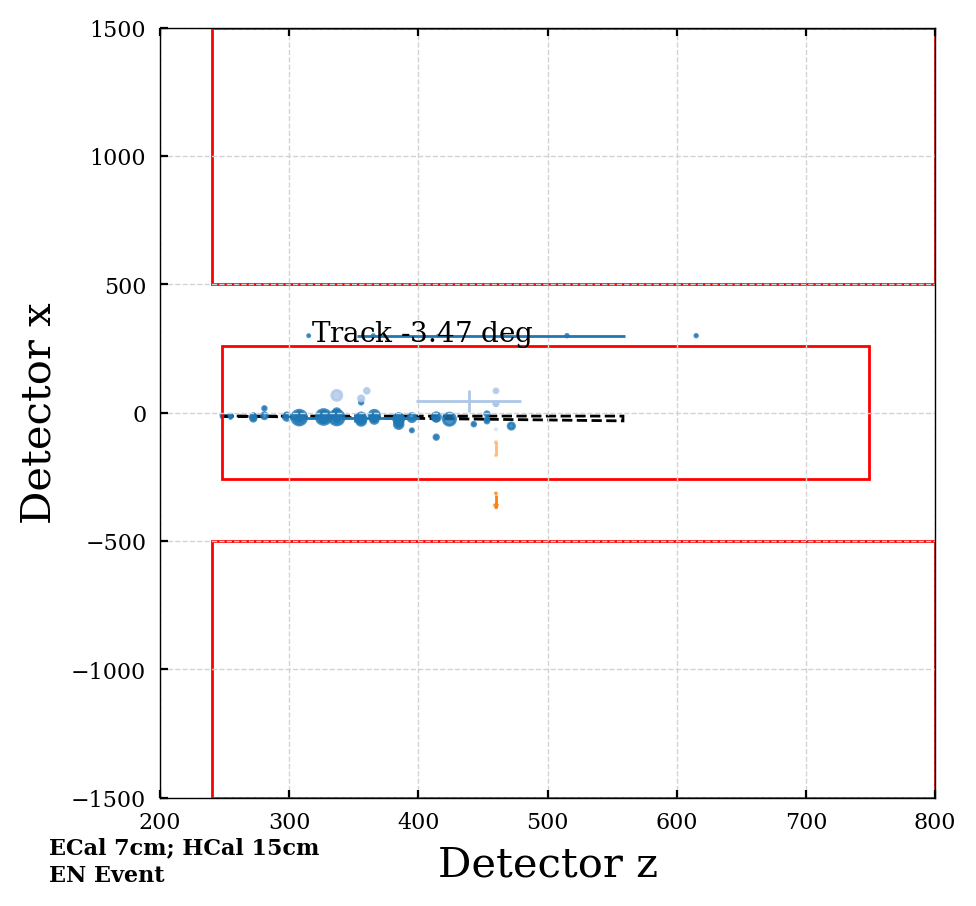

# of particles: 5
# of clust: 1
particle index: 1118


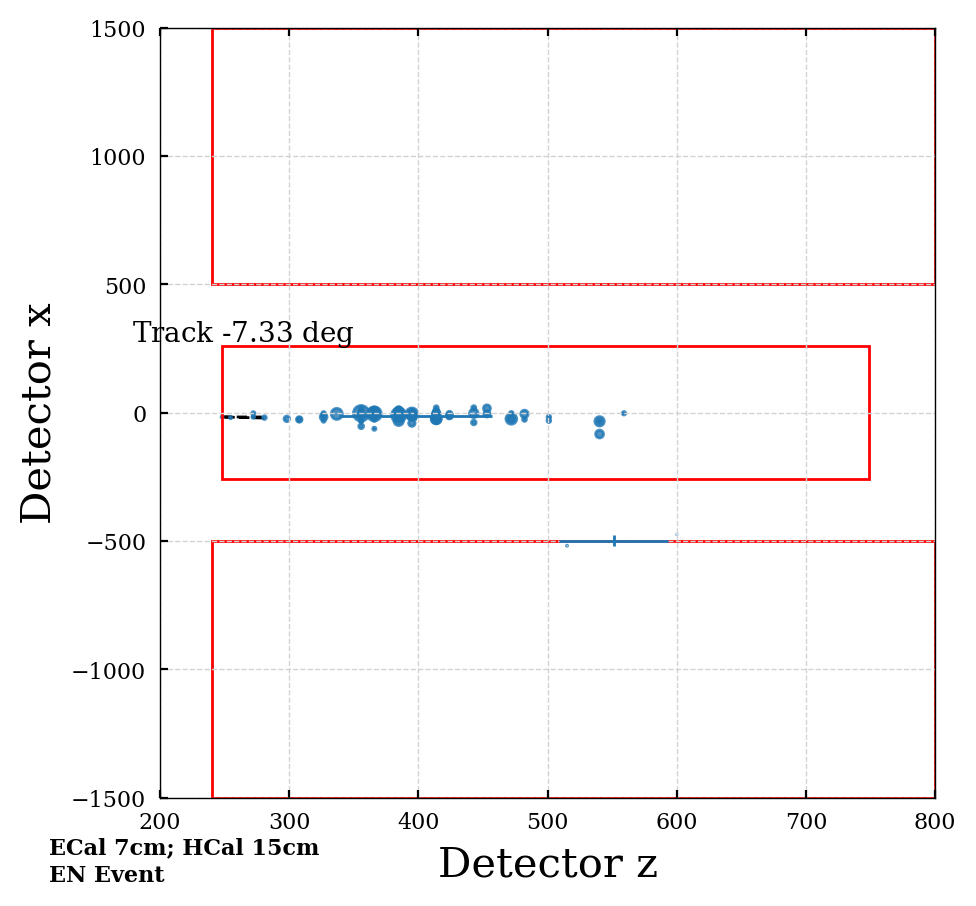

# of particles: 2
# of clust: 1
particle index: 4545


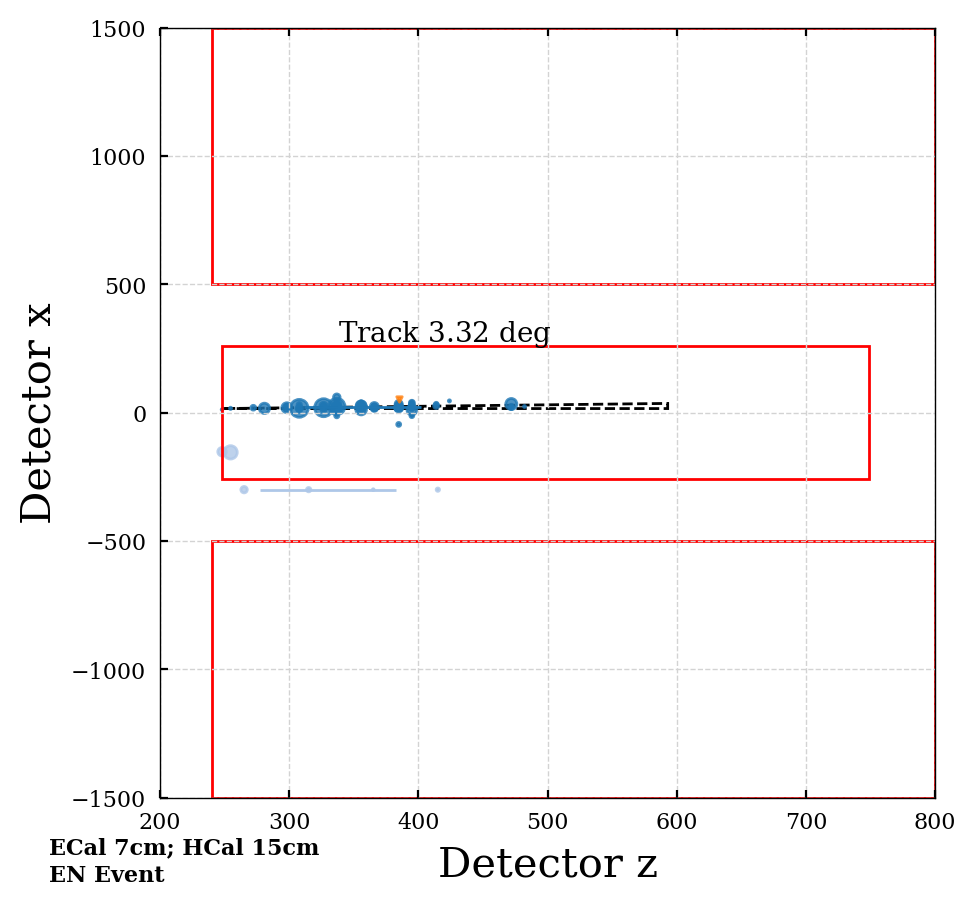

# of particles: 2
# of clust: 1
particle index: 2077


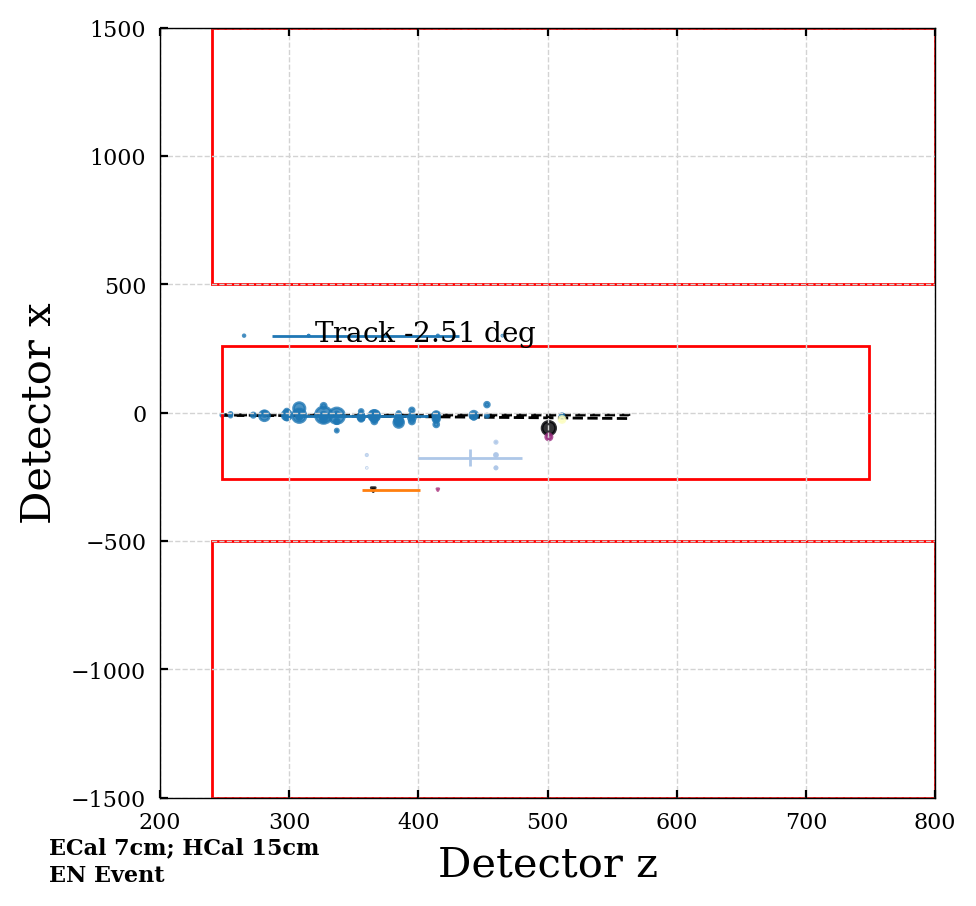

In [71]:
plot_cluster_dist(en_event, ipart=None, xlim=1000, ylim=1500, angle_label=False)
# randomly select events
for ipart in np.random.randint(0, high=1e4, size=10, dtype=int):
    plot_cluster_dist(en_event, ipart=ipart, xlim=800, ylim=1500, angle_label=False)

# Cluster statistics

* Number of particles
* Number of clusters
* Number of reconstructed clusters
* PID matches pdgID

In [113]:
list(en_event.propdict.keys())

['EcalTotalEnergy',
 'HcalTotalEnergy',
 'PFTruth/PFTruth.second.vertexVolume_',
 'PFEcalClusters_hitIDs',
 'PFEcalClusters_energy_lc',
 'PFEcalClusters_energy',
 'PFEcalClusters_nHits_lc',
 'PFEcalClusters_nHits',
 'PFEcalClusters_centroidX_lc',
 'PFEcalClusters_centroidX',
 'PFEcalClusters_centroidY_lc',
 'PFEcalClusters_centroidY',
 'PFEcalClusters_centroidZ_lc',
 'PFEcalClusters_centroidZ',
 'PFEcalClusters_rmsX_lc',
 'PFEcalClusters_rmsX',
 'PFEcalClusters_rmsY_lc',
 'PFEcalClusters_rmsY',
 'PFEcalClusters_rmsZ_lc',
 'PFEcalClusters_rmsZ',
 'PFEcalClusters_DXDZ',
 'PFEcalClusters_DYDZ',
 'PFEcalClusters_errDXDZ',
 'PFEcalClusters_errDYDZ',
 'PFEcalClusters_hitX_lc',
 'PFEcalClusters_hitX',
 'PFEcalClusters_hitY_lc',
 'PFEcalClusters_hitY',
 'PFEcalClusters_hitZ_lc',
 'PFEcalClusters_hitZ',
 'PFEcalClusters_hitE_lc',
 'PFEcalClusters_hitE',
 'PFHcalClusters_hitIDs',
 'PFHcalClusters_energy_lc',
 'PFHcalClusters_energy',
 'PFHcalClusters_nHits_lc',
 'PFHcalClusters_nHits',
 'PFHcalC

## Types of particles

In [145]:
pid_keys_full = {
    '-321': 'K –',
    '-311': 'anti K 0',
    '-211': 'π -',
    '-11': 'e +',
    '11': 'e –',
    '22': 'γ',
    '111': 'π 0',
    '211': 'π +',
    '311': 'K 0',
    '321': 'K +',
    '2112': 'n',
    '2212': 'p',
    '3112': 'Σ baryon –',
    '3122': 'Λ baryon',
    '3212': 'Σ baryon 0',
    '3222': 'Σ baryon +',
}
types, counts = np.unique(ak.to_numpy(ak.ravel(en_event.get('PFTruth_second_pdgID'))).filled(np.nan), return_counts=True)
for pid in pid_keys_full.keys():
    pid_keys_full[pid] = [pid_keys_full[pid], counts[list(types.astype(str)).index(pid)]]
pd.DataFrame(pid_keys_full, index=['particle', 'count'])

,-321,-311,-211,-11,11,22,111,211,311,321,2112,2212,3112,3122,3212,3222
particle,K –,anti K 0,π -,e +,e –,γ,π 0,π +,K 0,K +,n,p,Σ baryon –,Λ baryon,Σ baryon 0,Σ baryon +
count,18,20,3670,2,20001,220,5084,3369,134,102,44343,45496,34,115,1,44


In [135]:
pid_keys = {
    '-321': 'K –',
    '-211': 'π -',
    '-11': 'e +',
    '11': 'e –',
    '22': 'γ',
    '211': 'π +',
    '321': 'K +',
    '2112': 'n',
    '2212': 'p',
    '3112': 'Σ baryon –',
    '3122': 'Λ baryon',
    '3222': 'Σ baryon +',
}
types, counts = np.unique(ak.to_numpy(ak.ravel(en_event.get('PFTruthTarget_pdgID'))).filled(np.nan), return_counts=True)
for pid in pid_keys.keys():
    pid_keys[pid] = [pid_keys[pid], counts[list(types.astype(str)).index(pid)]]
pd.DataFrame(pid_keys, index=['particle', 'count'])

,-321,-211,-11,11,22,211,321,2112,2212,3112,3122,3222
particle,K –,π -,e +,e –,γ,π +,K +,n,p,Σ baryon –,Λ baryon,Σ baryon +
count,18,2800,2,20092,145,2615,92,27420,17538,34,115,44


In [134]:
pid_keys = {
    '-321': 'K –',
    '-211': 'π -',
    '11': 'e –',
    '22': 'γ',
    '211': 'π +',
    '321': 'K +',
    '2112': 'n',
    '2212': 'p',
    '3122': 'Λ baryon'
}
types, counts = np.unique(ak.to_numpy(ak.ravel(en_event.get('PFTruthEcal_pdgID'))).filled(0), return_counts=True)
for pid in pid_keys.keys():
    pid_keys[pid] = [pid_keys[pid], counts[list(types.astype(str)).index(pid)]]
pd.DataFrame(pid_keys, index=['particle', 'count'])

,-321,-211,11,22,211,321,2112,2212,3122
particle,K –,π -,e –,γ,π +,K +,n,p,Λ baryon
count,17,1878,19940,102,1785,71,16091,8622,7


## Cluster # and ID

In [142]:
# number of particles
num_parts = np.array([len(_) for _ in en_event.get('PFTruth_second_energy')])
print(num_parts)

# number of good clusters
num_good_clusts = en_event.get('PFEcalClusters_good_count')
print(num_good_clusts)

# number of PF reconstructed clusters
num_pf_clusts = np.array([len(_) for _ in en_event.get('PFEcalClusters_energy')])
print(num_pf_clusts)

[ 4  6  2 ...  4  2 13]
[3 1 1 ... 1 1 1]
[5 1 1 ... 2 1 1]


In [155]:
pdgid_dict = {pid_keys_full[key][0]:key for key in pid_keys_full.keys()}
pdgid_dict

{'K –': '-321',
 'anti K 0': '-311',
 'π -': '-211',
 'e +': '-11',
 'e –': '11',
 'γ': '22',
 'π 0': '111',
 'π +': '211',
 'K 0': '311',
 'K +': '321',
 'n': '2112',
 'p': '2212',
 'Σ baryon –': '3112',
 'Λ baryon': '3122',
 'Σ baryon 0': '3212',
 'Σ baryon +': '3222'}

In [160]:
en_event.get('PFTruthEcal_pdgID')

<Array [[2212, 11], ..., [2112, 2112, ..., 11]] type='19999 * var * ?int32'>

In [197]:
pdgid = float(pdgid_dict['p'])  # protons
part_mask = np.array([pdgid in _ for _ in en_event.get('PFTruthEcal_pdgID')])
part_mask

array([ True, False, False, ...,  True, False,  True])

In [187]:
# how many protons in total?
np.sum(ak.to_numpy(ak.ravel(en_event.get('PFTruthEcal_pdgID'))) == float(pdgid_dict['p']))

8622

In [168]:
def int_bin(x):
    return np.binary_repr(x).rjust(3, '0')
np.vectorize(int_bin)(range(8))

array(['000', '001', '010', '011', '100', '101', '110', '111'],
      dtype='<U3')

In [173]:
# check reconstructed PID of all protons
tally_pid = ak.to_numpy(ak.ravel([np.vectorize(int_bin)(_) for _ in en_event.get('PFCandidates_pid')[part_mask]]))
tally_pid

array(['011', '010', '010', ..., '010', '100', '011'], dtype='<U3')

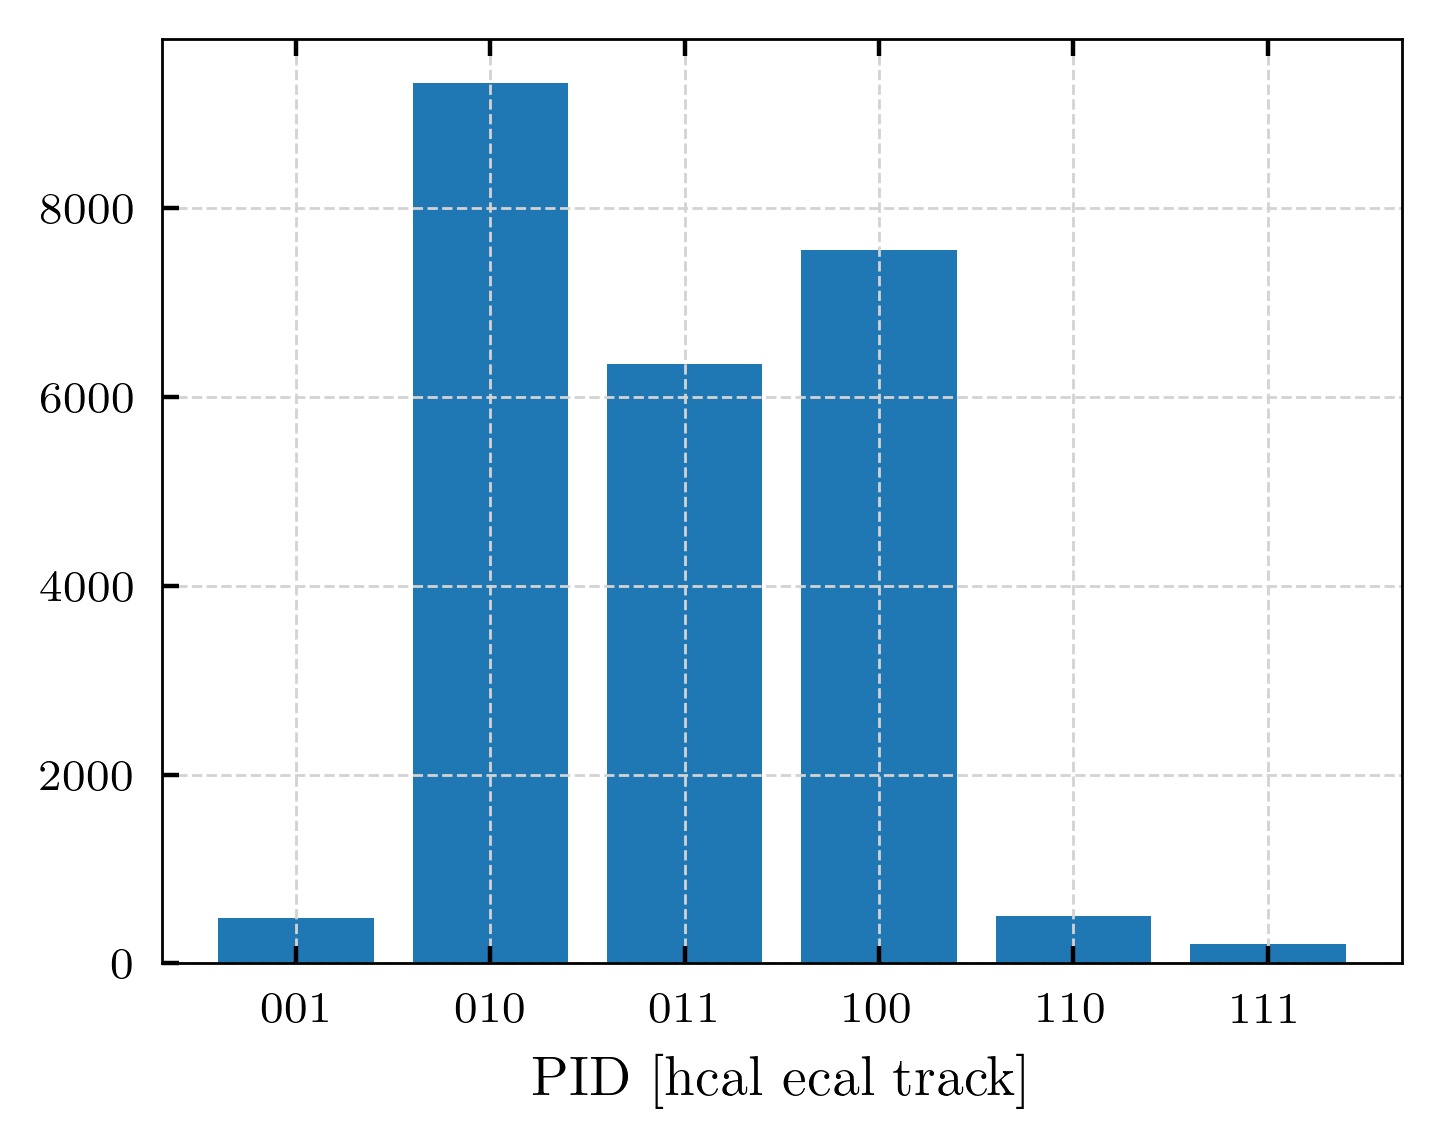

In [207]:
fig, ax = plt.subplots(figsize=(4,3))
unique, counts = np.unique(tally_pid, return_counts=True)
ax.bar(unique, counts)
ax.set_xlabel('PID [hcal ecal track]')
plt.show()

## Matching

In [200]:
list(en_event.propdict.keys())

['EcalTotalEnergy',
 'HcalTotalEnergy',
 'PFTruth/PFTruth.second.vertexVolume_',
 'PFEcalClusters_hitIDs',
 'PFEcalClusters_energy_lc',
 'PFEcalClusters_energy',
 'PFEcalClusters_nHits_lc',
 'PFEcalClusters_nHits',
 'PFEcalClusters_centroidX_lc',
 'PFEcalClusters_centroidX',
 'PFEcalClusters_centroidY_lc',
 'PFEcalClusters_centroidY',
 'PFEcalClusters_centroidZ_lc',
 'PFEcalClusters_centroidZ',
 'PFEcalClusters_rmsX_lc',
 'PFEcalClusters_rmsX',
 'PFEcalClusters_rmsY_lc',
 'PFEcalClusters_rmsY',
 'PFEcalClusters_rmsZ_lc',
 'PFEcalClusters_rmsZ',
 'PFEcalClusters_DXDZ',
 'PFEcalClusters_DYDZ',
 'PFEcalClusters_errDXDZ',
 'PFEcalClusters_errDYDZ',
 'PFEcalClusters_hitX_lc',
 'PFEcalClusters_hitX',
 'PFEcalClusters_hitY_lc',
 'PFEcalClusters_hitY',
 'PFEcalClusters_hitZ_lc',
 'PFEcalClusters_hitZ',
 'PFEcalClusters_hitE_lc',
 'PFEcalClusters_hitE',
 'PFHcalClusters_hitIDs',
 'PFHcalClusters_energy_lc',
 'PFHcalClusters_energy',
 'PFHcalClusters_nHits_lc',
 'PFHcalClusters_nHits',
 'PFHcalC

In [196]:
pdgid = float(pdgid_dict['p'])  # protons
full_mask_ecal = pdgid == en_event.get('PFTruthEcal_pdgID')
full_mask_ecal

<Array [[True, False], ..., [False, ..., False]] type='19999 * var * ?bool'>

In [203]:
pdgid = float(pdgid_dict['p'])  # protons
full_mask_ecal = pdgid == en_event.get('PFTruthTarget_pdgID')
full_mask_ecal

<Array [[True, False], ..., [False, ..., False]] type='19999 * var * ?bool'>

In [204]:
en_event.get('PFTruthTarget_energy')

<Array [[1.87e+03, 857], [...], ..., [959, ...]] type='19999 * var * ?float32'>

In [ ]:
track_x = en_event.get('PFTruthTarget_x')
track_y = en_event.get('PFTruthTarget_y')
track_z = en_event.get('PFTruthTarget_z')
track_dxdz = en_event.get('PFTruthTarget_px')/en_event.get('PFTruthTarget_pz')
track_dydz = en_event.get('PFTruthTarget_py')/en_event.get('PFTruthTarget_pz')

ecal_centroid_x = en_event.get('PFEcalClusters_centroidX')
ecal_centroid_y = en_event.get('PFEcalClusters_centroidY')
ecal_centroid_z = en_event.get('PFEcalClusters_centroidZ')
ecal_rms_x = en_event.get('PFEcalClusters_rmsX')
ecal_rms_y = en_event.get('PFEcalClusters_rmsY')

ecal_proj_x = track_x + track_dxdz * (ecal_centroid_z - track_z)
ecal_proj_y = track_y + track_dydz * (ecal_centroid_z - track_z)

dist = np.hypot((ecal_proj_x - ecal_centroid_x)/np.max([1.0, ecal_rms_x]),
                (ecal_proj_y - ecal_centroid_y)/np.max([1.0, ecal_rms_y]))